In [12]:
!pip install langchain-community pymupdf rapidocr-onnxruntime boto3 botocore Pillow anthropic IPython --quiet


In [13]:
import boto3
import json
import time
import base64
from PIL import Image
import io
import os
from IPython.display import display
import ipywidgets as widgets
from langchain_community.document_loaders import PyMuPDFLoader
import fitz


In [14]:
# Initialize bedrock client for given region and endpoint. Change as per your region
bedrock_client = boto3.client(
    service_name='bedrock-runtime', 
    region_name='us-east-1'
)


In [15]:
# Function to convert image to base64
def image_to_base64(image_path):
    with open(image_path, "rb") as image_file:
        binary_data = image_file.read()
        base_64_encoded_data = base64.b64encode(binary_data)
        base64_string = base_64_encoded_data.decode('utf-8')
    return base64_string

In [17]:
local_pdf_file = './bedrock-ug.pdf'
# Load the PDF file
loader = PyMuPDFLoader(local_pdf_file)
pages = loader.load_and_split()


In [18]:
# Open the PDF document
doc = fitz.open(local_pdf_file)
dpi = 400

# Convert page 1 to image
page1 = doc.load_page(0)  # Page numbers start from 0
pix1 = page1.get_pixmap(dpi=dpi)
pix1.save("image1.jpg")

# Convert page 2 to image
page2 = doc.load_page(1)
pix2 = page2.get_pixmap(dpi=dpi)
pix2.save("image2.jpg")

# Convert page 2 to image
page2 = doc.load_page(2)
pix2 = page2.get_pixmap(dpi=dpi)
pix2.save("image3.jpg")

# Convert page 2 to image
page2 = doc.load_page(3)
pix2 = page2.get_pixmap(dpi=dpi)
pix2.save("image4.jpg")


# Don't forget to close the document
doc.close()

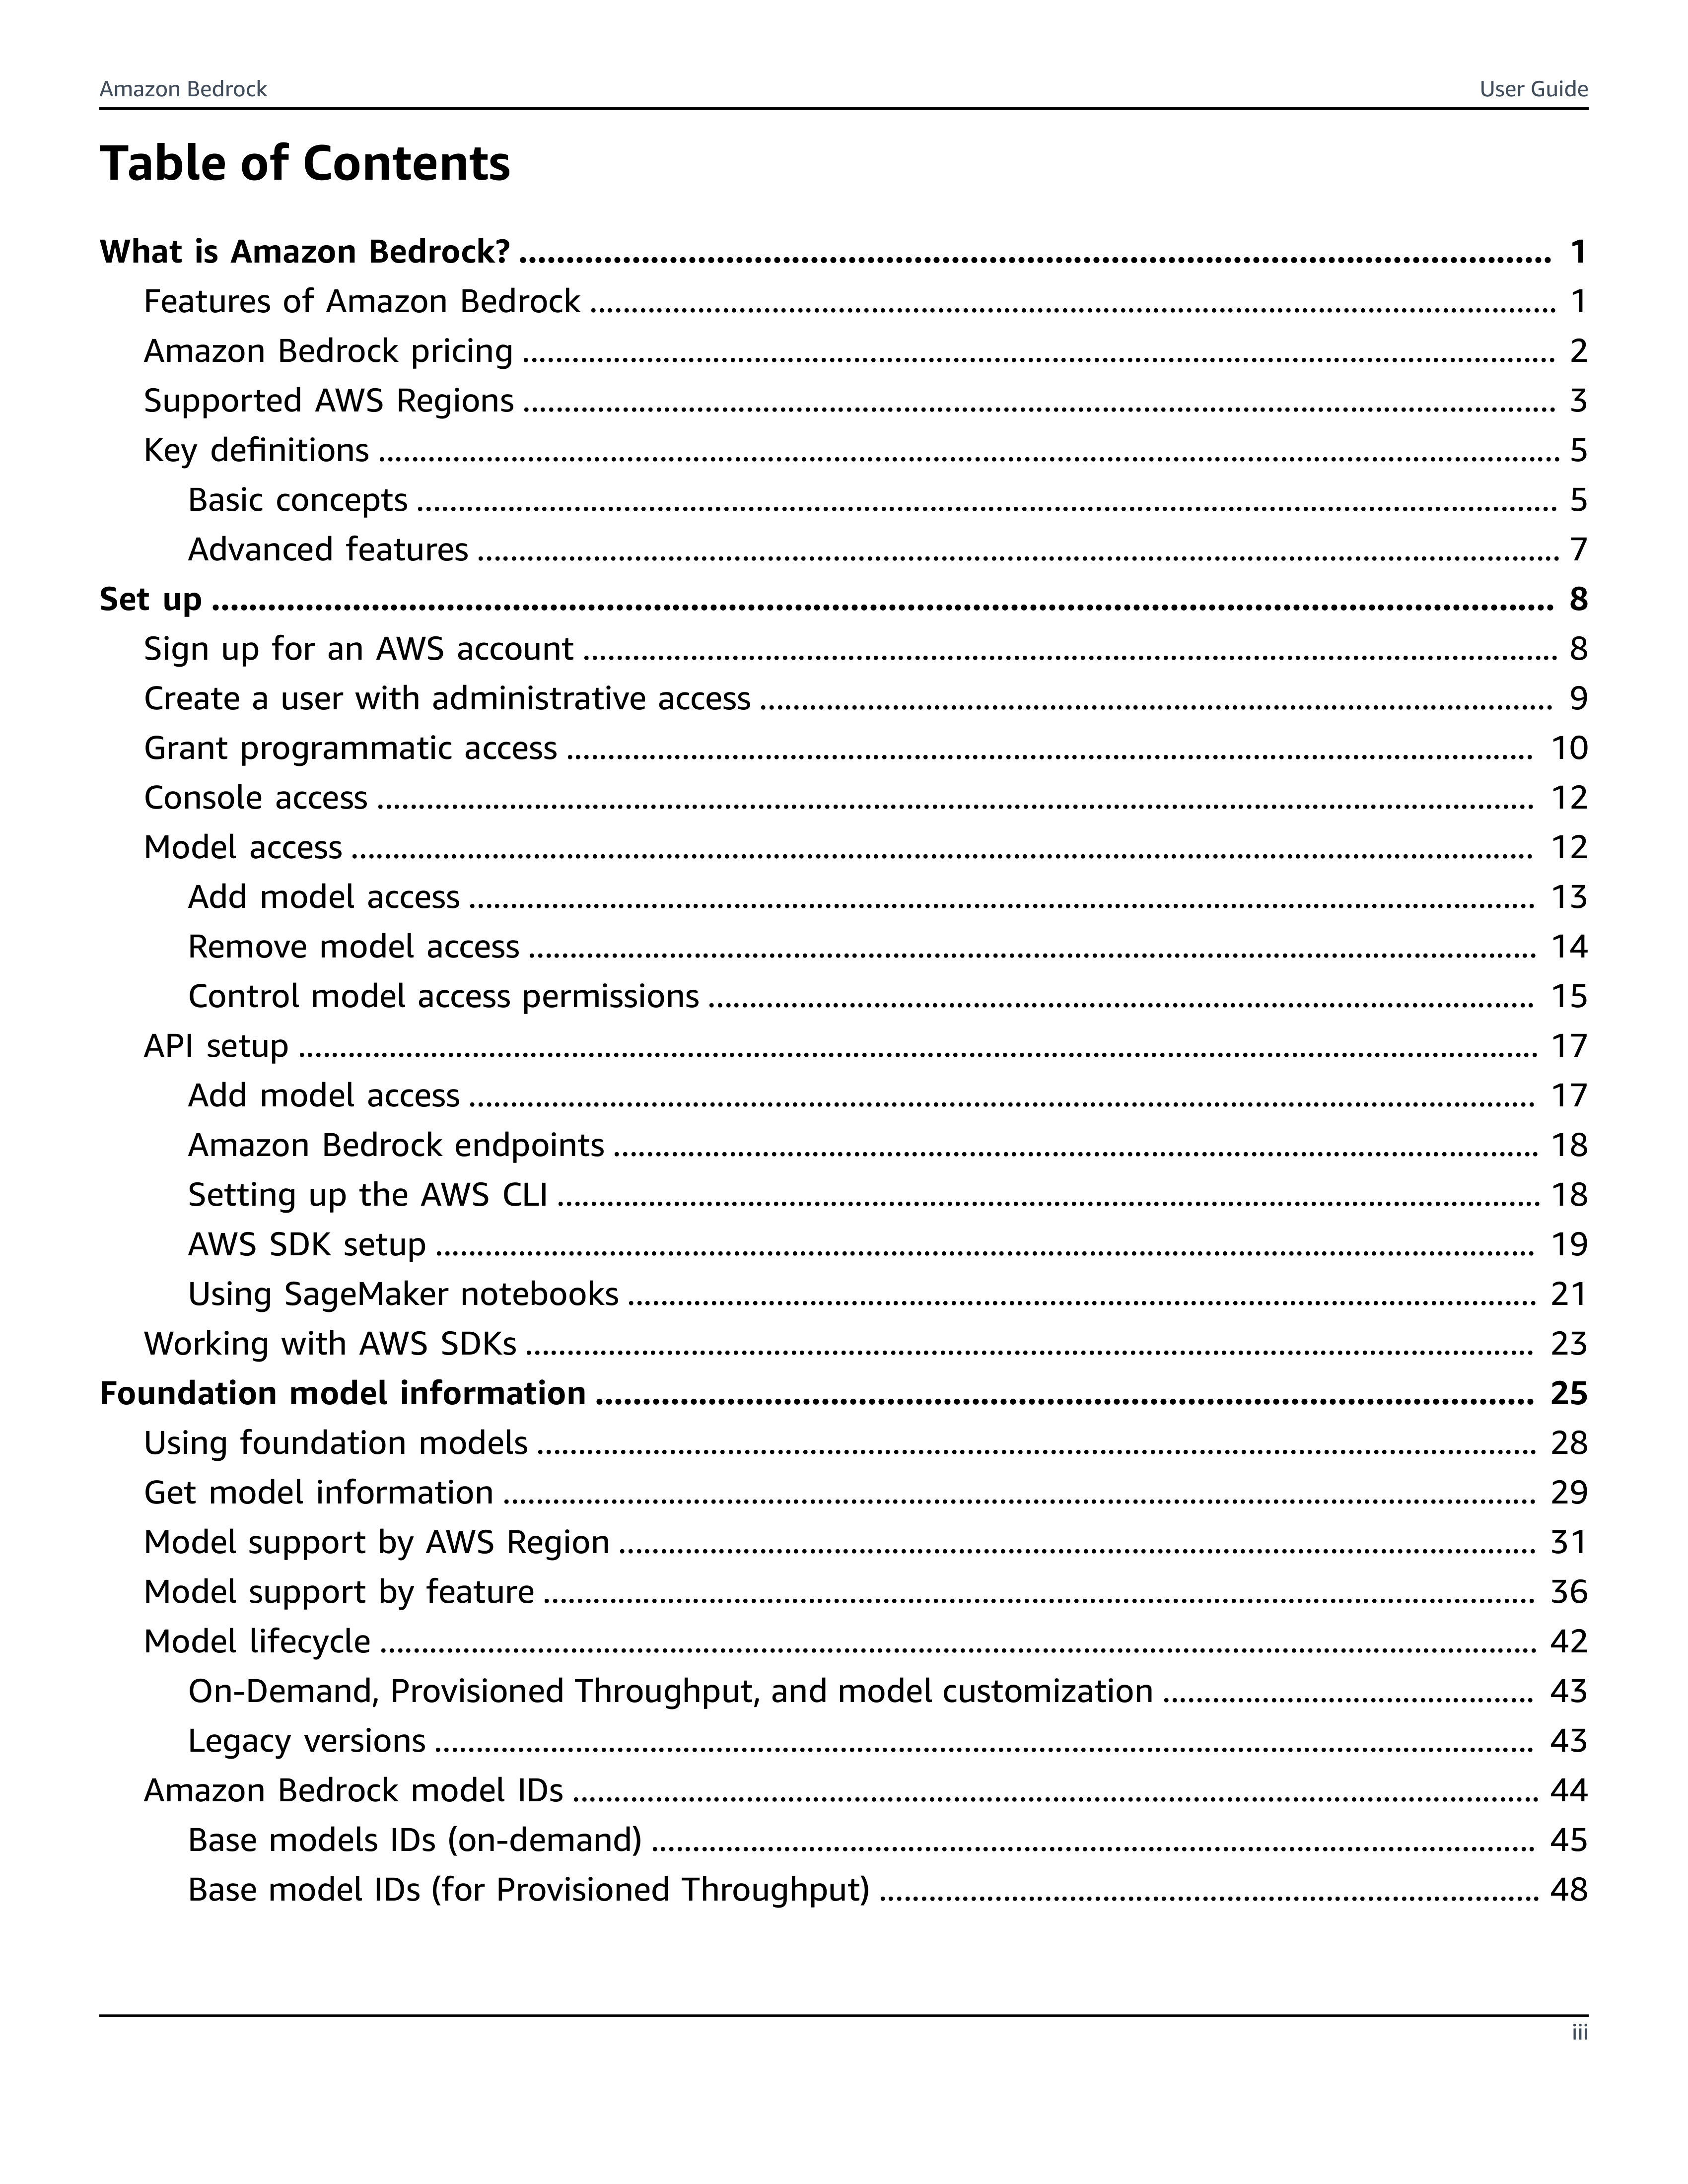

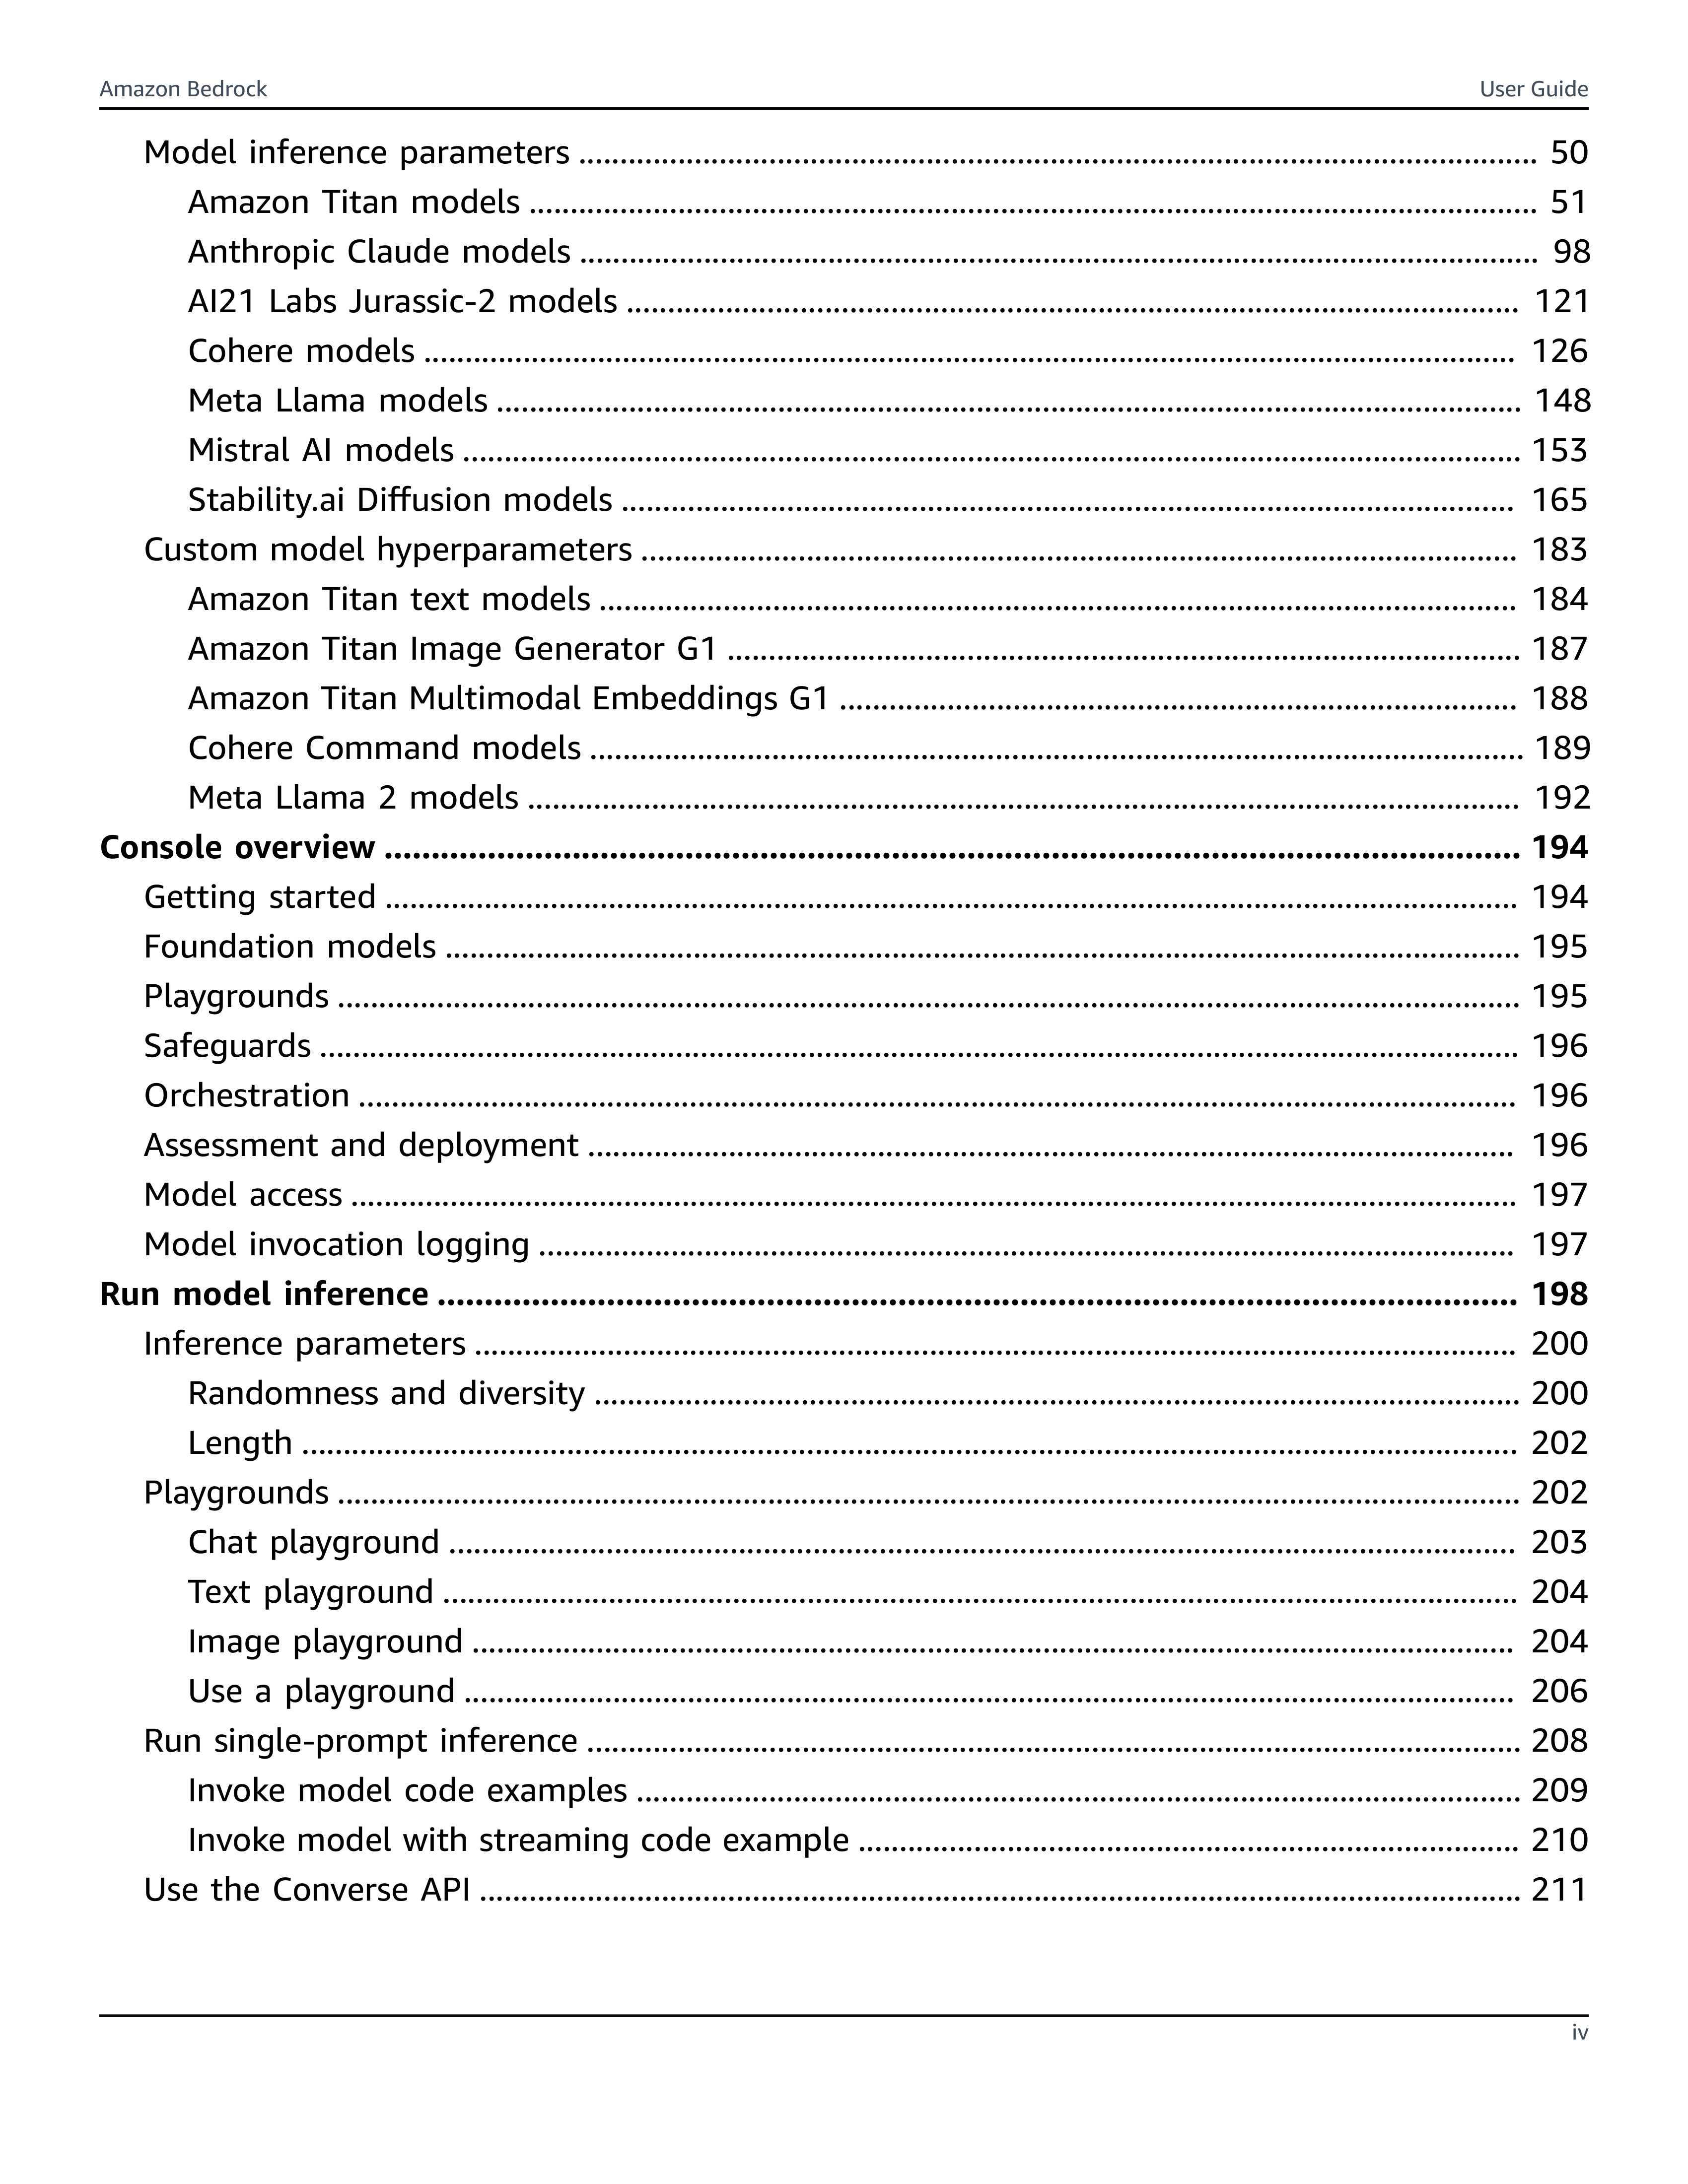

In [19]:
# Display images (if needed)
display(Image.open("image3.jpg"))
display(Image.open("image4.jpg"))

In [20]:
# based on a prompt.
#
# Arguments:
#   prompt: The text prompt to provide to the LLM.
#   llm_type: The name of the LLM to use'. 
#
# Returns:
#   The text generated by the LLM in response to the prompt.
#   
# This function:
# 1. Prints the llm_type for debugging.
# 2. Formats the prompt into the JSON payload expected by each LLM API.
# 3. Specifies the parameters for text generation like max tokens, temp.
# 4. Calls the Bedrock client to invoke the LLM model API. 
# 5. Parses the response to extract the generated text.
# 6. Returns the generated text string.

def interactWithLLM(prompt,image,modelId):
	
    # if llm_type == 'anthropic.claude-3-sonnet':
        print("**THE LLM TYPE IS -->" + model_id)
        body = json.dumps({
                          "anthropic_version": "bedrock-2023-05-31",
                          "max_tokens": 1000,
                          "temperature": 0,
                          "messages": [
                            {
                              "role": "user",
                              "content": [
                                {
                                  "type": "image",
                                  "source": {
                                    "type": "base64",
                                    "media_type": "image/jpeg",
                                    "data": image
                                  }
                                },
                                {
                                  "type": "text",
                                  "text": prompt
                                }
                              ]
                            }
                          ]
                        }) 
        # modelId = 'anthropic.claude-3-sonnet-20240229-v1:0' # change this to use a different version from the model provider
        accept = 'application/json'
        contentType = 'application/json'
        start_time = time.time()
        response = bedrock_client.invoke_model(body=body, modelId=modelId, accept=accept, contentType=contentType)
         # Record the end time
        end_time = time.time()

        # Calculate the runtime
        runtime = end_time - start_time
        print(f"The runtime of the invoke_model was {runtime:.2f} seconds.")
        
        response_body = json.loads(response.get('body').read())
        response_text = response_body.get('content')[0]['text']

        return response_text

In [21]:
##### Interact with a large language model (LLM) to generate text 
# based on a prompt.
#
# Arguments:
#   prompt: The text prompt to provide to the LLM.
#   llm_type: The name of the LLM to use'. 
#
# Returns:
#   The text generated by the LLM in response to the prompt.
#   
# This function:
# 1. Prints the llm_type for debugging.
# 2. Formats the prompt into the JSON payload expected by each LLM API.
# 3. Specifies the parameters for text generation like max tokens, temp.
# 4. Calls the Bedrock client to invoke the LLM model API. 
# 5. Parses the response to extract the generated text.
# 6. Returns the generated text string.

def interactWithLLM_2Images(prompt,image1,image2,modelId):
	
    # if llm_type == 'anthropic.claude-3-sonnet':
        print("**THE LLM TYPE IS -->" + model_id)
        body = json.dumps({
                          "anthropic_version": "bedrock-2023-05-31",
                          "max_tokens": 1000,
                          "messages": [
                            {
                              "role": "user",
                              "content": [
                                {
                                  "type": "image",
                                  "source": {
                                    "type": "base64",
                                    "media_type": "image/jpeg",
                                    "data": image1
                                  }
                                },
                                {
                                  "type": "text",
                                  "text": prompt
                                },
                                   {
                                  "type": "image",
                                  "source": {
                                    "type": "base64",
                                    "media_type": "image/jpeg",
                                    "data": image2
                                  }
                                },
                                {
                                  "type": "text",
                                  "text": prompt
                                }
                              ]
                            }
                          ]
                        }) 
        # modelId = 'anthropic.claude-3-sonnet-20240229-v1:0' # change this to use a different version from the model provider
        accept = 'application/json'
        contentType = 'application/json'
        start_time = time.time()
        response = bedrock_client.invoke_model(body=body, modelId=modelId, accept=accept, contentType=contentType)
         # Record the end time
        end_time = time.time()

        # Calculate the runtime
        runtime = end_time - start_time
        print(f"The runtime of the invoke_model was {runtime:.2f} seconds.")
        
        response_body = json.loads(response.get('body').read())
        response_text = response_body.get('content')[0]['text']

        return response_text

In [23]:
# Example usage
image_path = './image3.jpg'  # Specify the path to your image
base64_string_1 = image_to_base64(image_path)


In [24]:
model_id = 'anthropic.claude-3-haiku-20240307-v1:0'

#model_id = 'anthropic.claude-3-sonnet-20240229-v1:0'

In [25]:
response_text_1 = interactWithLLM("show the content of the image as a JSON. ",base64_string_1,model_id)
print('response_text --- \n' + response_text_1)

**THE LLM TYPE IS -->anthropic.claude-3-haiku-20240307-v1:0
The runtime of the invoke_model was 7.92 seconds.
response_text --- 
Here is the content of the image in JSON format:

{
  "Table of Contents": [
    {
      "title": "What is Amazon Bedrock?",
      "page": 1
    },
    {
      "title": "Features of Amazon Bedrock",
      "page": 1
    },
    {
      "title": "Amazon Bedrock pricing",
      "page": 2
    },
    {
      "title": "Supported AWS Regions",
      "page": 3
    },
    {
      "title": "Key definitions",
      "page": 5,
      "sub-items": [
        {
          "title": "Basic concepts",
          "page": 5
        },
        {
          "title": "Advanced features",
          "page": 7
        }
      ]
    },
    {
      "title": "Set up",
      "page": 8,
      "sub-items": [
        {
          "title": "Sign up for an AWS account",
          "page": 8
        },
        {
          "title": "Create a user with administrative access",
          "page": 9
       

In [29]:
#model_id = 'anthropic.claude-3-haiku-20240307-v1:0'

model_id = 'anthropic.claude-3-sonnet-20240229-v1:0'

In [30]:
# Example usage
image_path = './image4.jpg'  # Specify the path to your image
base64_string_2 = image_to_base64(image_path)


In [31]:
response_text_2 = interactWithLLM("extract the content of the image as a JSON. ",base64_string_2,model_id)
print('response_text --- \n' + response_text_2)

**THE LLM TYPE IS -->anthropic.claude-3-sonnet-20240229-v1:0
The runtime of the invoke_model was 9.77 seconds.
response_text --- 
{
  "Model inference parameters": 50,
  "Amazon Titan models": 51,
  "Anthropic Claude models": 98,
  "AI21 Labs Jurassic-2 models": 121,
  "Cohere models": 126,
  "Meta Llama models": 148,
  "Mistral AI models": 153,
  "Stability.ai Diffusion models": 165,
  "Custom model hyperparameters": 183,
  "Amazon Titan text models": 184,
  "Amazon Titan Image Generator G1": 187,
  "Amazon Titan Multimodal Embeddings G1": 188,
  "Cohere Command models": 189,
  "Meta Llama 2 models": 192,
  "Console overview": 194,
  "Getting started": 194,
  "Foundation models": 195,
  "Playgrounds": 195,
  "Safeguards": 196,
  "Orchestration": 196,
  "Assessment and deployment": 196,
  "Model access": 197,
  "Model invocation logging": 197,
  "Run model inference": 198,
  "Inference parameters": 200,
  "Randomness and diversity": 200,
  "Length": 202,
  "Playgrounds": 202,
  "Chat p

In [55]:
def interactWithLLM_text(prompt, modelId):
    # if llm_type == 'anthropic.claude-3-sonnet':
    print("**THE LLM TYPE IS -->" + modelId)
    body = json.dumps({
        "anthropic_version": "bedrock-2023-05-31",
        "max_tokens": 1000,
        "temperature": 0,
        "messages": [
            {
                "role": "user",
                "content": prompt
            }
        ]
    })
    # modelId = 'anthropic.claude-3-sonnet-20240229-v1:0' # change this to use a different version from the model provider
    accept = 'application/json'
    contentType = 'application/json'
    start_time = time.time()
    response = bedrock_client.invoke_model(body=body, modelId=modelId, accept=accept, contentType=contentType)
    # Record the end time
    end_time = time.time()

    # Calculate the runtime
    runtime = end_time - start_time
    print(f"The runtime of the invoke_model was {runtime:.2f} seconds.")

    response_body = json.loads(response.get('body').read())
    response_text = response_body.get('content')[0]['text']

    return response_text

In [56]:
response_text = interactWithLLM_text("combine as JSON and remove any duplicates "+response_text_1 + response_text_2,model_id)
print('response_text --- \n' + response_text)

**THE LLM TYPE IS -->anthropic.claude-3-haiku-20240307-v1:0
The runtime of the invoke_model was 3.66 seconds.
response_text --- 
{
  "manualName": "Genie Service Manual",
  "edition": "First Edition, Second Printing",
  "partNumber": "52709",
  "serialNumberRange": {
    "start": 9998,
    "end": 21179
  },
  "models": {
    "start": "Z-45/25",
    "end": "Z-45/25J"
  },
  "date": "September 2000",
  "otherDetails": [
    "Read, understand and obey the safety rules and operating instructions in the Genie Z-45/25 & Genie Z-45/25J Operator's Manual before attempting any maintenance or repair procedure.",
    "This service manual covers the Genie Z-45/25 & Genie Z-45/25J 2WD and 4WD models introduced in 1998.",
    "This manual provides detailed scheduled maintenance information for the machine owner and user. It also provides troubleshooting and repair procedures for qualified service professionals.",
    "Basic mechanical, hydraulic and electrical skills are required to perform most pro

In [57]:
!ls -altr

total 57232
drwx------  2 root     root        16384 Mar 26 16:37 lost+found
drwxr-xr-x  2 ec2-user ec2-user     4096 Mar 26 16:37 .sparkmagic
-rw-rw-r--  1 ec2-user ec2-user   106742 Mar 26 16:55 org_chart.jpeg
-rw-rw-r--  1 ec2-user ec2-user   923792 Mar 26 16:55 school_notes.png
-rw-rw-r--  1 ec2-user ec2-user   584872 Mar 26 16:55 samp1.png
drwx------  4 ec2-user ec2-user     4096 Mar 26 16:55 .Trash-1000
-rw-rw-r--  1 ec2-user ec2-user  1381374 Mar 26 16:58 vehicle_form.jpeg
-rw-rw-r--  1 ec2-user ec2-user   130796 Mar 26 16:59 complex_page.jpeg
-rw-rw-r--  1 ec2-user ec2-user  7326973 Mar 26 17:04 Genie_manual.pdf
-rw-rw-r--  1 ec2-user ec2-user  8586020 Mar 26 17:04 skyjack_manual.pdf
-rw-rw-r--  1 ec2-user ec2-user   117858 Apr  3 23:08 kitchen.webp
drwxrwxr-x  2 ec2-user ec2-user     4096 Apr  3 23:08 real-estate-images
drwxrwxr-x  3 ec2-user ec2-user     4096 Apr  4 00:14 anthropic
drwxrwxr-x  6 ec2-user ec2-user     4096 Apr  4 00:14 images
drwxrwxr-x 14 ec2-user ec2-user   

In [43]:
#model_id = 'anthropic.claude-3-haiku-20240307-v1:0'

model_id = 'anthropic.claude-3-sonnet-20240229-v1:0'
response_text_2 = interactWithLLM_2Images("""show the content of the image as a JSON. The JSON should have the manual name, edition, date,  models(start and end as applicable) and serial number Range for the model (start and end as applicable), other details if NOT already in JSON. 
Also tell me which model is mapped to the serial number 16600676""",base64_string_1,base64_string_2,model_id)
print('response_text --- \n' + response_text_2)


**THE LLM TYPE IS -->anthropic.claude-3-sonnet-20240229-v1:0
The runtime of the invoke_model was 14.87 seconds.
response_text --- 
{
  "manualName": "SE Series Slab Scissors - Service & Parts Manual",
  "edition": 95918,
  "date": "January 2024",
  "models": [
    {
      "model": "1930SE",
      "serialNumberRange": {
        "start": 16402100,
        "end": null
      }
    },
    {
      "model": "2632SE",
      "serialNumberRange": {
        "start": 16500900,
        "end": null
      }
    },
    {
      "model": "3346SE",
      "serialNumberRange": {
        "start": 16600600,
        "end": null
      }
    },
    {
      "model": "4046SE",
      "serialNumberRange": {
        "start": 16701300,
        "end": null
      }
    },
    {
      "model": "4556SE",
      "serialNumberRange": {
        "start": 16801400,
        "end": null
      }
    }
  ],
  "companyDetails": {
    "name": "MEC Aerial Work Platforms",
    "address": "1401 S. Madera Avenue, Kerman, CA 93630 USA",
